## Imports

In [1]:
# python IO for ROOT files
import uproot

# numpy
import numpy as np

# For interactive plotting
import matplotlib.pyplot as plt
from matplotlib import patches
%matplotlib widget

## Import data

All output arrays are structured like: `arrayName=["parameter name", event number, hit number]`

### Parameters included in the simulation root file for the straw tube detector:

(pos and mom are given in x, y, and z coordinates in the lab frame)
- <pre>trackID		: Index of MCTrack</pre>
- <pre>detID		: Detector ID</pre>
- <pre>tubeID		: Number of tube</pre>
- <pre>pos		: Coordinates of MC point [cm]</pre>
- <pre>posInLocal	: Local coordinates at entrance to active volume [cm]</pre>
- <pre>posOutLocal	: Local coordinates at exit of active volume [cm]</pre>
- <pre>momIn		: Momentum of track at entrance [GeV]</pre>
- <pre>momOut		: Momentum of track at exit [GeV]</pre>
- <pre>tof	   	: Time since event start [ns]</pre>
- <pre>length		: Track length since creation [cm]</pre>
- <pre>eLoss		: Energy deposit [GeV] </pre>
- <pre>Mass            : Mass of the particle [GeV] </pre>

In [2]:
# Import the exact positions and momenta of the muons inside on of the tubes of the straw tube detector
stt_sim_params = uproot.open("/home/n_idw/simFiles/root/mum2mup2_sim.root:pndsim/STTPoint") # path to the branch in the root file
stt_sim_coords = stt_sim_params.arrays(["STTPoint.fX" , "STTPoint.fY" , "STTPoint.fZ" ]) # extract the exact x, y, z coordinates of the muons in the STT
stt_sim_mom    = stt_sim_params.arrays(["STTPoint.fPx", "STTPoint.fPy", "STTPoint.fPz"]) # extract the exact x, y, z components of the momentum of the muons in the STT

# Import the track ID of a given MCPoint
stt_sim_trackID = stt_sim_params["STTPoint.fTrackID"].array() # extract the track ID of the muons in the STT

# Import the local coordinates where a straw tube was entered and exited
stt_sim_stEntryPoint = stt_sim_params.arrays(["STTPoint.fX_in_local" , "STTPoint.fY_in_local" , "STTPoint.fZ_in_local"] ) # extract coordinates where the particle entered a straw tube
stt_sim_stExitPoint  = stt_sim_params.arrays(["STTPoint.fX_out_local", "STTPoint.fY_out_local", "STTPoint.fZ_out_local"]) # extract coordinates where the particle exited a straw tube

### Parameters included in the digitized root file for the straw tube detector:

(pos and mom are given in x, y, and z coordinates in the lab frame)
- <pre> detID		: Detector unique volume ID </pre>
- <pre> tubeID		: Unique tube ID </pre>
- <pre> mcindex	: Index of corresponding MCPoint </pre>
- <pre> pos		: Position coordinates of the tube [cm] </pre>
- <pre> dpos		: Errors in position coordinates [cm] </pre>
- <pre> isochrone	: The radial measurement </pre>
- <pre> isoerror	: The erroon on the radial measurement </pre>
- <pre> chDep		: Deposited charge (arbitrary unit)  </pre>

In [3]:
# Import the exact positions and momenta of the muons inside on of the tubes of the straw tube detector
stt_digi_params 	= uproot.open("/home/n_idw/simFiles/root/mum2mup2_digi.root:pndsim/STTHit") # path to the branch in the root file
stt_digi_coords 	= stt_digi_params.arrays(["STTHit.fX"  , "STTHit.fY"  , "STTHit.fZ" ]) # extract the x, y, z hit coordinates of the muons in the STT
stt_digi_coords_err = stt_digi_params.arrays(["STTHit.fDx" , "STTHit.fDy" , "STTHit.fDz" ]) # extract the errors of the x, y, z hit coordinates of the muons in the STT

### Parameters included in the simulation root file for the MVD detector:

(In the code they are members of the class PndSdsMCPoint)

(pos and mom are given in x, y, and z coordinates in the lab frame)
- <pre> trackID     : Index of MCTrack </pre>
- <pre> detID       : Detector ID </pre>
- <pre> sensorID    : Full nameId of the detector, see PndSdsGeoHandling </pre>
- <pre> posIn       : Coordinates of ingoing point[cm] </pre>
- <pre> posOut      : Coordinates of outgoing point[cm] </pre>
- <pre> momIn       : Momentum of track at entrance [GeV] </pre>
- <pre> momOut      : Momentum of track at exit [GeV] </pre>
- <pre> tof         : Time since event start [ns] </pre>
- <pre> length      : Track length since creation [cm] </pre>
- <pre> eLoss       : Energy deposit [GeV]  </pre>

In [4]:
# Import the exact positions and momenta of the muons at the MVD detection layers
mvd_sim_params = uproot.open("/home/n_idw/simFiles/root/mum2mup2_sim.root:pndsim/MVDPoint") # path to the branch in the root file
mvd_sim_coords = mvd_sim_params.arrays(["MVDPoint.fX" , "MVDPoint.fY" , "MVDPoint.fZ" ]) # extract the exact x, y, z coordinates of the muons in the MVD
mvd_sim_mom    = mvd_sim_params.arrays(["MVDPoint.fPx", "MVDPoint.fPy", "MVDPoint.fPz"]) # extract the exact x, y, z components of the momentum of the muons in the MVD

### Parameters included in the digitized root file for the MVD detector:

(In the code they are members of the class PndSdsHit)

(In the MC file hits are divided into pixel hits and strip hits)

(pos and mom are given in x, y, and z coordinates in the lab frame)
<pre> - detID	: Detector ID </pre>
<pre> - sensorID	: Sensor ID </pre>
<pre> - pos		: Position vector [cm] </pre>
<pre> - dpos		: Position error vector [cm] </pre>
<pre> - index	: Array index of ClusterCand </pre>
<pre> - charge	: Charge measured in hit </pre>
<pre> - NDigiHits	: Number of pixels fired for this event  </pre>
(it seems parameters are missing here that are in the root file!)

In [5]:
# Import the hit positions and their respective errors in the MVD pixels
mvdPixel_digi_params 	= uproot.open("/home/n_idw/simFiles/root/mum2mup2_digi.root:pndsim/MVDHitsPixel") # path to the branch in the root file
mvdPixel_digi_coords 	= mvdPixel_digi_params.arrays(["MVDHitsPixel.fX" , "MVDHitsPixel.fY" , "MVDHitsPixel.fZ" ]) # extract the x, y, z hit coordinates in the MVD pixel detectors
mvdPixel_digi_coords_err= mvdPixel_digi_params.arrays(["MVDHitsPixel.fDx", "MVDHitsPixel.fDy", "MVDHitsPixel.fDz"]) # extract the errors of the x, y, z hit components  

# Import the hit positions and their respective errors in the MVD strips
mvdStrip_digi_params 	= uproot.open("/home/n_idw/simFiles/root/mum2mup2_digi.root:pndsim/MVDHitsStrip") # path to the branch in the root file
mvdStrip_digi_coords 	= mvdStrip_digi_params.arrays(["MVDHitsStrip.fX" , "MVDHitsStrip.fY" , "MVDHitsStrip.fZ" ]) # extract the x, y, z hit coordinates in the MVD strip detectors
mvdStrip_digi_coords_err= mvdStrip_digi_params.arrays(["MVDHitsStrip.fDx", "MVDHitsStrip.fDy", "MVDHitsStrip.fDz"]) # extract the errors of the x, y, z hit components

## Plot 2D Projections of the MC Points in the MVD and STT

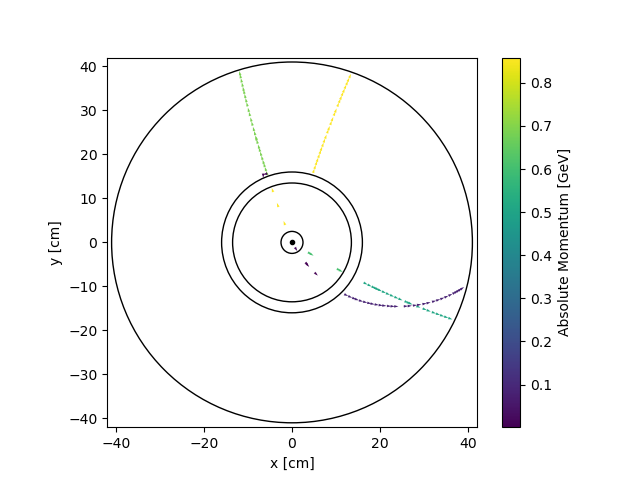

In [17]:
eventNumber = 3

sstX = np.array(stt_sim_coords["STTPoint.fX",eventNumber])
sstY = np.array(stt_sim_coords["STTPoint.fY",eventNumber])
sstPx = np.array(stt_sim_mom["STTPoint.fPx",eventNumber])
sstPy = np.array(stt_sim_mom["STTPoint.fPy",eventNumber])
sstAbsP = np.sqrt(sstPx**2 + sstPy**2)
sstPxNorm = sstPx/sstAbsP
sstPyNorm = sstPy/sstAbsP

mvdX = np.array(mvd_sim_coords["MVDPoint.fX",eventNumber])
mvdY = np.array(mvd_sim_coords["MVDPoint.fY",eventNumber])
mvdPx = np.array(mvd_sim_mom["MVDPoint.fPx",eventNumber])
mvdPy = np.array(mvd_sim_mom["MVDPoint.fPy",eventNumber])
mvdAbsP = np.sqrt(mvdPx**2 + mvdPy**2)
mvdPxNorm = mvdPx/mvdAbsP
mvdPyNorm = mvdPy/mvdAbsP

fig = plt.figure()
ax = plt.subplot()
ax.quiver(sstX,sstY,sstPxNorm,sstPyNorm,sstAbsP,angles='xy',scale_units='xy',scale=1,width=0.01,pivot="mid")
# ax.scatter(sstX,sstY,marker=".",color="black",s=1)
ax.quiver(mvdX,mvdY,mvdPxNorm,mvdPyNorm,mvdAbsP,angles='xy',scale_units='xy',scale=1,width=0.01,pivot="mid")

mvdRadii = [2.5,13.5]
for radius in mvdRadii:
	circle = patches.Circle((0,0), radius=radius, color='black', fill=False)
	ax.add_patch(circle)

sttInner = patches.Circle((0,0), radius=16.0, color='black', fill=False)
ax.add_patch(sttInner)

sstOuter = patches.Circle((0,0), radius=41.0, color='black', fill=False)
ax.add_patch(sstOuter)


ax.plot(0,0,"black",marker=".")
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")
ax.set_xlim(-42,42)
ax.set_ylim(-42,42)
ax.set_aspect('equal', adjustable='box')

sm = plt.cm.ScalarMappable(cmap='viridis', norm=plt.Normalize(vmin=sstAbsP.min(), vmax=sstAbsP.max()))
sm.set_array([])  # Dummy array for the color bar
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Absolute Momentum [GeV]')

plt.show()

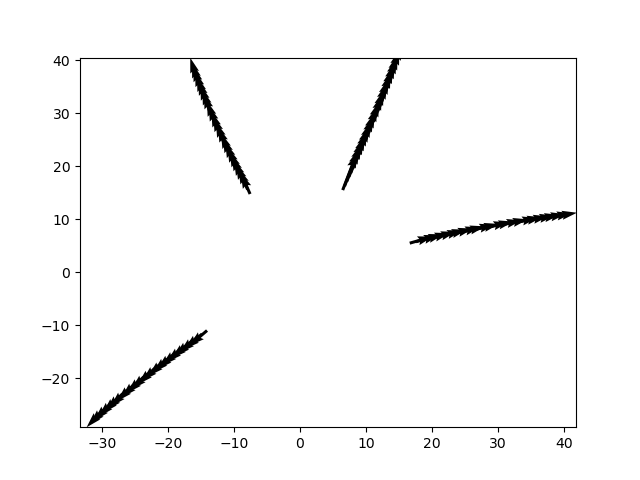

In [7]:
eventNumber=0
X = np.array(stt_sim_coords["STTPoint.fX",eventNumber])
Y = np.array(stt_sim_coords["STTPoint.fY",eventNumber])
U = np.array(stt_sim_mom["STTPoint.fPx",eventNumber])
V = np.array(stt_sim_mom["STTPoint.fPy",eventNumber])

fig1, ax1 = plt.subplots()
Q = ax1.quiver(X,Y,U,V)
plt.show()

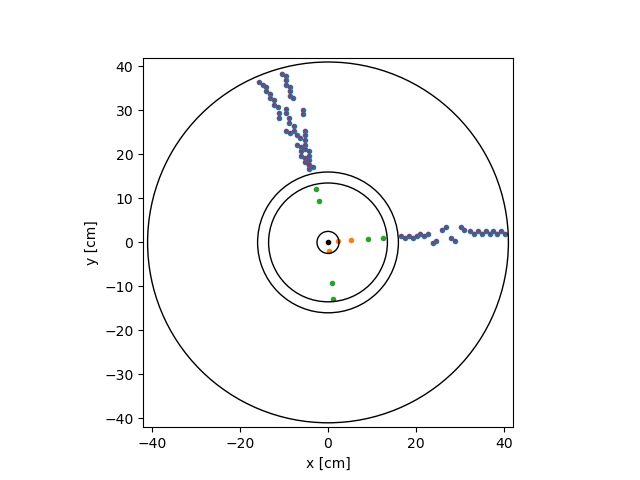

In [15]:
eventNumber = 5
fig = plt.figure()
ax = plt.subplot()
ax.scatter(stt_digi_coords["STTHit.fX",eventNumber],stt_digi_coords["STTHit.fY" ,eventNumber],marker=".")

x = stt_digi_coords["STTHit.fX",eventNumber]
y = stt_digi_coords["STTHit.fY",eventNumber]
xerr = stt_digi_coords_err["STTHit.fDx",eventNumber]
yerr = stt_digi_coords_err["STTHit.fDy",eventNumber]

# Add ellipses representing the error margins
for (xi, yi, xe, ye) in zip(x, y, xerr, yerr):
    ellipse = patches.Ellipse((xi, yi), width=2*xe, height=2*ye, edgecolor='red', facecolor='red', alpha=0.3)
    ax.add_patch(ellipse)
    
ax.scatter(mvdPixel_digi_coords["MVDHitsPixel.fX",eventNumber],mvdPixel_digi_coords["MVDHitsPixel.fY",eventNumber],marker=".")
ax.scatter(mvdStrip_digi_coords["MVDHitsStrip.fX",eventNumber],mvdStrip_digi_coords["MVDHitsStrip.fY",eventNumber],marker=".")

mvdRadii = [2.5,13.5]
for radius in mvdRadii:
	circle = patches.Circle((0,0), radius=radius, color='black', fill=False)
	ax.add_patch(circle)

sttInner = patches.Circle((0,0), radius=16.0, color='black', fill=False)
ax.add_patch(sttInner)

sstOuter = patches.Circle((0,0), radius=41.0, color='black', fill=False)
ax.add_patch(sstOuter)


ax.plot(0,0,"black",marker=".")
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")
ax.set_xlim(-42,42)
ax.set_ylim(-42,42)
ax.set_aspect('equal', adjustable='box')
plt.show()

## 3D Visualization of the MC Points in the MVD and STT

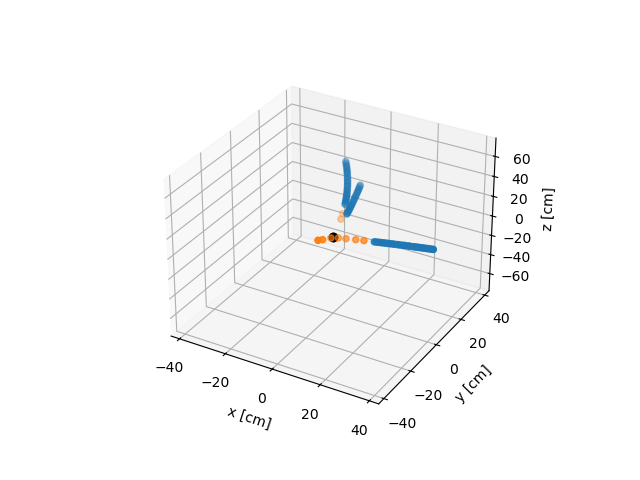

In [16]:
eventNumber = 5

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(stt_sim_coords["STTPoint.fX",eventNumber], stt_sim_coords["STTPoint.fY",eventNumber], stt_sim_coords["STTPoint.fZ",eventNumber])
ax.scatter(mvd_sim_coords["MVDPoint.fX",eventNumber], mvd_sim_coords["MVDPoint.fY",eventNumber], mvd_sim_coords["MVDPoint.fZ",eventNumber])
ax.plot([0,0],[0,0],[0,0],marker="o",color="black")
ax.set_xlim(-42,42)
ax.set_ylim(-42,42)
ax.set_zlim(-75,75)
ax.set_xlabel("x [cm]")
ax.set_ylabel("y [cm]")
ax.set_zlabel("z [cm]")
plt.show()